In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
data.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

These are the descriptions for the daatset:


1. `id`: Unique identifier for each observation in the dataset.
2. `X_Minimum`: Minimum x-coordinate of the defect bounding box.
3. `X_Maximum`: Maximum x-coordinate of the defect bounding box.
4. `Y_Minimum`: Minimum y-coordinate of the defect bounding box.
5. `Y_Maximum`: Maximum y-coordinate of the defect bounding box.
6. `Pixels_Areas`: Area of the defect in terms of pixels.
7. `X_Perimeter`: Perimeter of the defect along the x-axis.
8. `Y_Perimeter`: Perimeter of the defect along the y-axis.
9. `Sum_of_Luminosity`: Sum of luminosity values within the defect area.
10. `Minimum_of_Luminosity`: Minimum luminosity value within the defect area.
11. `Maximum_of_Luminosity`: Maximum luminosity value within the defect area.
12. `Length_of_Conveyer`: Length of the conveyer belt at the time of inspection.
13. `TypeOfSteel_A300`: Indicator for whether the steel type is A300.
14. `TypeOfSteel_A400`: Indicator for whether the steel type is A400.
15. `Steel_Plate_Thickness`: Thickness of the steel plate.
16. `Edges_Index`: Index representing the ratio of the length of the perimeter to the bounding box perimeter.
17. `Empty_Index`: Index representing the ratio of empty pixels to the total pixels in the defect area.
18. `Square_Index`: Index representing the ratio of the area of the defect to the area of the bounding box.
19. `Outside_X_Index`: Index representing the ratio of the number of exterior horizontal edges to the total number of edges.
20. `Edges_X_Index`: Index representing the ratio of horizontal edges to the total number of edges.
21. `Edges_Y_Index`: Index representing the ratio of vertical edges to the total number of edges.
22. `Outside_Global_Index`: Index representing the ratio of exterior edges to the total number of edges.
23. `LogOfAreas`: Logarithm of the area of the defect.
24. `Log_X_Index`: Logarithm of the horizontal position index.
25. `Log_Y_Index`: Logarithm of the vertical position index.
26. `Orientation_Index`: Index representing the orientation of the defect.
27. `Luminosity_Index`: Index representing the luminosity of the defect.
28. `SigmoidOfAreas`: Sigmoid transformation of the area of the defect.
29. `Pastry`, `Z_Scratch`, `K_Scatch`, `Stains`, `Dirtiness`, `Bumps`, `Other_Faults`: Binary indicators representing different types of defects, where each column indicates the presence or absence of a specific defect type.

In [4]:
data.dtypes

id                         int64
X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch  

In [5]:
TypeOfSteel = [1&x for x in data.TypeOfSteel_A400.to_list()]
TypeOfSteel_test = [1&x for x in test_data.TypeOfSteel_A400.to_list()]

In [6]:
# merging TypeOfSteel_A300 and TypeOfSteel_A400 into one feature
data['TypeOfSteel'] = TypeOfSteel
test_data['TypeOfSteel'] = TypeOfSteel_test
data.drop(columns=['TypeOfSteel_A300', 'TypeOfSteel_A400'], inplace=True)
test_data.drop(columns=['TypeOfSteel_A300', 'TypeOfSteel_A400'], inplace=True)

In [7]:
test_data.shape

(12814, 27)

In [9]:
test_data.to_csv("../data/test_modified.csv", index=False)

In [317]:
indexes = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum(axis=1).to_list()

In [318]:
positions_to_drop = [i for i, x in enumerate(indexes) if x!=1]

In [319]:
data.drop(positions_to_drop, inplace=True)

In [322]:
classes = np.array([i for i in range(7)]).T
class_name = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
Fault_class = data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']] @ classes

In [323]:
data['Fault_class'] = Fault_class
data.drop(columns=class_name, inplace=True)

In [324]:
data.drop(columns=['id'], inplace=True)

In [325]:
data.reset_index(inplace=True, drop=True)

In [410]:
data.to_csv("../data/data_faults_combined.csv", index=False)

<AxesSubplot:>

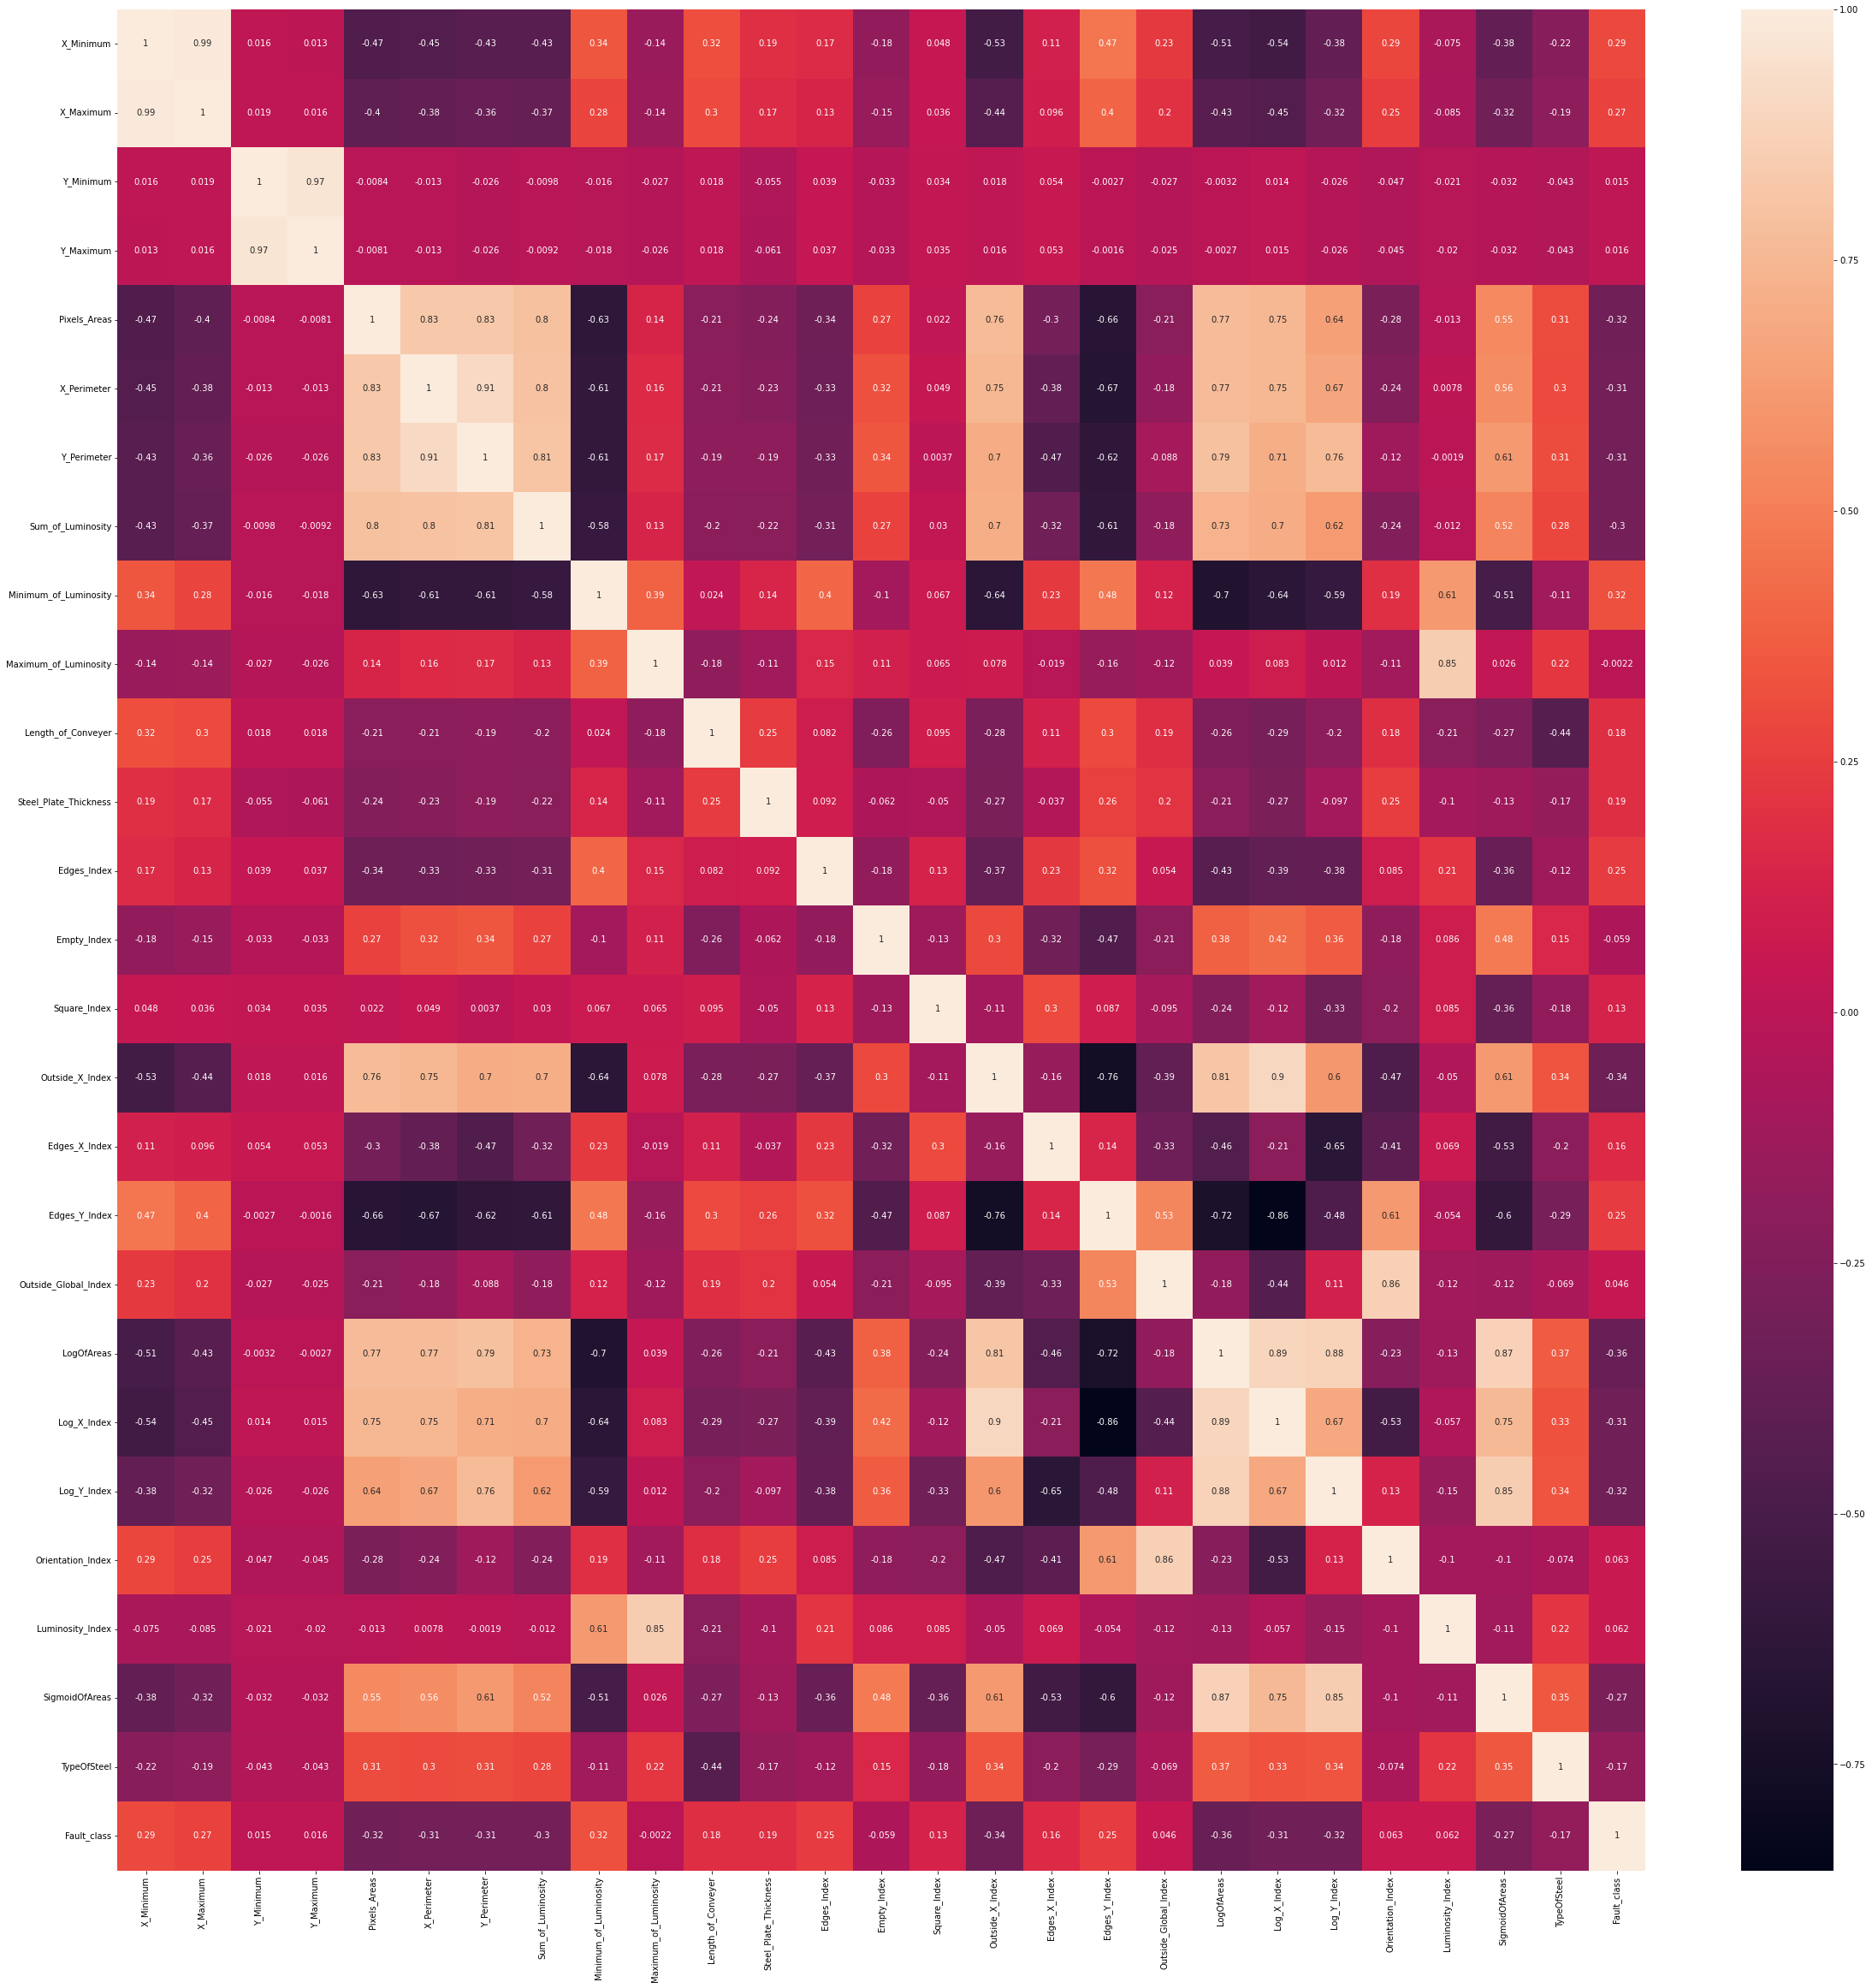

In [125]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(), annot=True)

# Implementing K-nearest neighbour

In [348]:
data.iloc[:1000,:].to_csv("../data/data-knn.csv", index=False)

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [462]:
features = data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
       'TypeOfSteel']]
target = data.Fault_class

test_features = test_data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
       'TypeOfSteel']]

In [340]:
from sklearn.preprocessing import MinMaxScaler

In [341]:
normalisation = StandardScaler()
features = normalisation.fit_transform(features)

normalisation_test = StandardScaler()
test_features = normalisation_test.fit_transform(test_features)

In [331]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=37)

In [332]:
from sklearn.neighbors import KNeighborsClassifier

In [342]:
X_train.shape, test_features.shape

((14704, 26), (12814, 26))

In [304]:
accuracies = []
for n in range(1, 200):
    print(f"Starting k={n}...")
    clf = KNeighborsClassifier(n_neighbors=n, weights='distance')
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_val)
    accuracies.append(accuracy_score(y_val, prediction))

Starting k=1...
Starting k=2...
Starting k=3...
Starting k=4...
Starting k=5...
Starting k=6...
Starting k=7...
Starting k=8...
Starting k=9...
Starting k=10...
Starting k=11...
Starting k=12...
Starting k=13...
Starting k=14...
Starting k=15...
Starting k=16...
Starting k=17...
Starting k=18...
Starting k=19...
Starting k=20...
Starting k=21...
Starting k=22...
Starting k=23...
Starting k=24...
Starting k=25...
Starting k=26...
Starting k=27...
Starting k=28...
Starting k=29...
Starting k=30...
Starting k=31...
Starting k=32...
Starting k=33...
Starting k=34...
Starting k=35...
Starting k=36...
Starting k=37...
Starting k=38...
Starting k=39...
Starting k=40...
Starting k=41...
Starting k=42...
Starting k=43...
Starting k=44...
Starting k=45...
Starting k=46...
Starting k=47...
Starting k=48...
Starting k=49...
Starting k=50...
Starting k=51...
Starting k=52...
Starting k=53...
Starting k=54...
Starting k=55...
Starting k=56...
Starting k=57...
Starting k=58...
Starting k=59...
Starti

<AxesSubplot:>

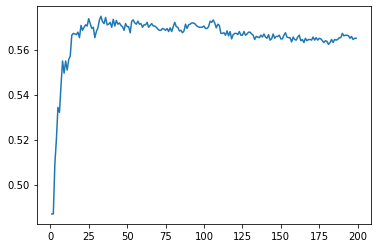

In [305]:
sns.lineplot(x=np.arange(1,200), y=accuracies)

### By looking at the graph above, we can go with `n_neighbours=25` for best performance

In [306]:
clf = KNeighborsClassifier(n_neighbors=25, weights='distance')

In [307]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [308]:
prediction = clf.predict(X_val)

In [309]:
accuracy = accuracy_score(y_val, prediction)
print(f"The accuracy of K-Nearest neighbour is {accuracy*100:0.2f}%")

The accuracy of K-Nearest neighbour is 57.37%


In [346]:
s = classification_report(y_val, prediction)
print(s)

              precision    recall  f1-score   support

           0       0.39      0.13      0.20       320
           1       0.55      0.48      0.52       229
           2       0.87      0.91      0.89       674
           3       0.71      0.75      0.73       118
           4       0.41      0.18      0.25        95
           5       0.48      0.55      0.51       914
           6       0.51      0.55      0.53      1326

    accuracy                           0.57      3676
   macro avg       0.56      0.51      0.52      3676
weighted avg       0.56      0.57      0.56      3676



In [343]:
submission = pd.read_csv("../data/sample_submission.csv")
submission.id = test_data.id
test_prediction = clf.predict_proba(test_features)
submission.iloc[:,1:] = test_prediction
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.405518,0.000000,0.000000,0.0,0.039579,0.119848,0.435055
1,19220,0.274760,0.000000,0.000000,0.0,0.199698,0.075018,0.450524
2,19221,0.000000,0.078961,0.072224,0.0,0.000000,0.362543,0.486272
3,19222,0.077273,0.000000,0.000000,0.0,0.000000,0.648592,0.274135
4,19223,0.077260,0.000000,0.000000,0.0,0.036158,0.579805,0.306777
...,...,...,...,...,...,...,...,...
12809,32028,0.267403,0.112980,0.000000,0.0,0.051920,0.129414,0.438282
12810,32029,0.150834,0.000000,0.081171,0.0,0.182427,0.237691,0.347877
12811,32030,0.000000,0.000000,0.908085,0.0,0.000000,0.000000,0.091915
12812,32031,0.324656,0.076529,0.000000,0.0,0.078917,0.087217,0.432681


In [345]:
submission.to_csv("../data/k_nn_submission.csv", index=False)

# Using SMOTE to remove imbalance in the dataset

In [349]:
from imblearn.over_sampling import SMOTE

In [350]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [351]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [362]:
accuracy_smote = []
for i in range(1,100):
    print(f"K={i}")
    clf_smote = KNeighborsClassifier(n_neighbors=i)
    clf_smote.fit(X_train_resampled, y_train_resampled)
    accuracy_smote.append(accuracy_score(y_val, clf_smote.predict(X_val)))

K=1
K=2
K=3
K=4
K=5
K=6
K=7
K=8
K=9
K=10
K=11
K=12
K=13
K=14
K=15
K=16
K=17
K=18
K=19
K=20
K=21
K=22
K=23
K=24
K=25
K=26
K=27
K=28
K=29
K=30
K=31
K=32
K=33
K=34
K=35
K=36
K=37
K=38
K=39
K=40
K=41
K=42
K=43
K=44
K=45
K=46
K=47
K=48
K=49
K=50
K=51
K=52
K=53
K=54
K=55
K=56
K=57
K=58
K=59
K=60
K=61
K=62
K=63
K=64
K=65
K=66
K=67
K=68
K=69
K=70
K=71
K=72
K=73
K=74
K=75
K=76
K=77
K=78
K=79
K=80
K=81
K=82
K=83
K=84
K=85
K=86
K=87
K=88
K=89
K=90
K=91
K=92
K=93
K=94
K=95
K=96
K=97
K=98
K=99


<AxesSubplot:>

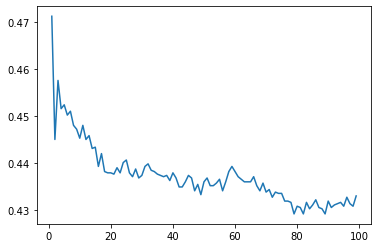

In [363]:
sns.lineplot(x=np.arange(1,100), y=accuracy_smote)

### SMOTE is not working well on this

# Trying oversampling

In [364]:
data.shape

(18380, 27)

In [365]:
data.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel,Fault_class
0,584,590,909972,909977,16,8,5,2274,113,140,...,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,1,3
1,808,816,728350,728372,433,20,54,44478,70,111,...,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,6
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,1,2


In [366]:
data.Fault_class.value_counts()

6    6540
5    4761
2    3411
0    1465
1    1150
3     568
4     485
Name: Fault_class, dtype: int64

In [367]:
data_fault_4 = data[data.Fault_class == 4]
data_fault_4 = pd.concat([data_fault_4]*5)

In [369]:
data_fault_3 = data[data.Fault_class == 3]
data_fault_3 = pd.concat([data_fault_3]*5)

In [371]:
data_fault_1 = data[data.Fault_class == 1]
data_fault_1 = pd.concat([data_fault_1]*3)

In [372]:
data_fault_0 = data[data.Fault_class == 0]
data_fault_0 = pd.concat([data_fault_0]*2)

In [375]:
data_oversampling = pd.concat([data, data_fault_0, data_fault_1, data_fault_3, data_fault_4])
data_oversampling = data_oversampling.sample(frac=1).reset_index(drop=True)

In [400]:
normalisation = StandardScaler()
data_oversampling.iloc[:,:-1] = normalisation.fit_transform(data_oversampling.iloc[:,:-1])

In [401]:
X_train, X_val, y_train, y_val = train_test_split(data_oversampling.iloc[:,:-1], data_oversampling.Fault_class, test_size=0.01)

In [402]:
accuracy_oversampling = []
for i in range(1,100):
    print(f"Stating for K={i}...")
    clf_oversampling = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf_oversampling.fit(X_train, y_train)
    print(f"Accuracy for K={i} is {accuracy_score(y_val, clf_oversampling.predict(X_val))}")
    accuracy_oversampling.append(accuracy_score(y_val, clf_oversampling.predict(X_val)))
    

Stating for K=1...
Accuracy for K=1 is 0.7342192691029901
Stating for K=2...
Accuracy for K=2 is 0.7342192691029901
Stating for K=3...
Accuracy for K=3 is 0.7275747508305648
Stating for K=4...
Accuracy for K=4 is 0.7242524916943521
Stating for K=5...
Accuracy for K=5 is 0.7342192691029901
Stating for K=6...
Accuracy for K=6 is 0.7109634551495017
Stating for K=7...
Accuracy for K=7 is 0.7043189368770764
Stating for K=8...
Accuracy for K=8 is 0.717607973421927
Stating for K=9...
Accuracy for K=9 is 0.7209302325581395
Stating for K=10...
Accuracy for K=10 is 0.7142857142857143
Stating for K=11...
Accuracy for K=11 is 0.7242524916943521
Stating for K=12...
Accuracy for K=12 is 0.7242524916943521
Stating for K=13...
Accuracy for K=13 is 0.7275747508305648
Stating for K=14...
Accuracy for K=14 is 0.7242524916943521
Stating for K=15...
Accuracy for K=15 is 0.7209302325581395
Stating for K=16...
Accuracy for K=16 is 0.717607973421927
Stating for K=17...
Accuracy for K=17 is 0.7275747508305648


<AxesSubplot:>

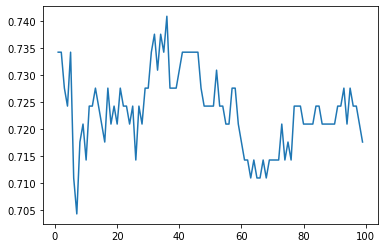

In [403]:
sns.lineplot(x=np.arange(1,100), y=accuracy_oversampling)

#### Oversampling seems to be doing very well. There can be a case of overfitting as well because we have copied lot of samples.

In [404]:
data_oversampling

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,TypeOfSteel,Fault_class
0,0.620564,0.605651,-0.125069,-0.121448,-0.352228,-0.363830,-0.389344,-0.319898,0.222984,0.096129,...,0.383704,-1.314149,-0.473202,0.048083,-0.905333,-1.154287,0.078242,-0.856333,-1.239658,5
1,1.022007,1.024437,1.096605,1.107864,-0.309411,-0.268421,-0.285391,-0.279437,0.600363,-0.200600,...,0.468941,0.792522,0.040215,0.048083,0.219478,0.386780,0.053759,0.339998,0.806674,1
2,0.004890,-0.012461,-0.482590,-0.481212,-0.153174,-0.173012,0.107322,0.058574,0.373936,3.434331,...,0.558212,0.792522,0.719871,-0.401120,1.019480,1.155983,1.509185,1.410638,0.806674,4
3,0.006820,-0.034608,-0.610193,-0.609608,-0.364322,-0.377460,-0.435545,-0.324256,1.355119,1.060499,...,-0.359720,-1.314149,-0.763777,-0.311327,-0.610695,-0.847261,1.450090,-0.952486,0.806674,3
4,-1.224530,-1.188283,2.920309,2.942996,-0.054791,0.692487,0.419181,2.362517,-0.192132,-0.126417,...,-1.926257,0.792522,0.942577,1.201378,1.053658,0.718982,-0.194440,1.413652,-1.239658,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30020,-0.074241,-0.119171,-0.286740,-0.284135,-0.370859,-0.404720,-0.527948,-0.328896,1.015479,0.467041,...,-0.071731,-1.314149,-1.010662,-0.867426,-1.162494,-0.676759,1.425607,-1.178550,0.806674,3
30021,-1.332610,-1.113788,-0.147133,-0.143559,1.808277,1.373982,0.938947,1.182164,-1.852596,-0.200600,...,-1.444595,-1.314149,2.004170,2.434251,1.164914,-1.601522,-0.474719,1.413652,0.806674,2
30022,0.933227,0.919741,1.961894,1.978557,-0.379684,-0.363830,-0.562599,-0.309558,-0.041180,-0.200600,...,0.648996,-1.314149,-1.713949,-0.499465,-1.735271,-0.562955,-0.269575,-1.066121,0.806674,3
30023,-1.099079,-1.192310,0.396473,0.403361,-0.337847,-0.282051,-0.262290,-0.302841,0.826790,0.467041,...,0.481045,0.792522,-0.248161,-0.228898,0.327198,0.146071,0.868426,-0.491918,-1.239658,1


In [405]:
test_features = test_data[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index',
       'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index',
       'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
       'TypeOfSteel']]
test_features = normalisation.fit_transform(test_features)

In [406]:
clf_oversampling = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf_oversampling.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [407]:
prediction_proba = clf_oversampling.predict_proba(test_features)

In [408]:
submission.iloc[:,1:] = prediction_proba

In [409]:
submission.to_csv("../data/submission_oversampling_knn.csv", index=False)

#### This is not giving good result on the test data.

# Generating synthetic data to resolve imbalance

In [413]:
from mostlyai import MostlyAI
 
# initialize client
mostly = MostlyAI(api_key='API_KEY')

In [414]:
# fetch configuration via API
g = mostly.generators.get('NUMERIC_CODE_FOR_GENERATOR')
config = g.config()
config

{'name': 'data_faults_combined',
 'description': None,
 'tables': [{'name': 'data_faults_combined',
   'sourceConnectorId': '8ae84adb-8bed-48e8-a73b-61903901dba0',
   'location': 'mostly-app/connectors/8ae84adb-8bed-48e8-a73b-61903901dba0/data_faults_combined',
   'data': None,
   'modelConfiguration': {'maxSampleSize': 18380,
    'batchSize': None,
    'modelSize': 'M',
    'maxTrainingTime': 10,
    'maxEpochs': 100,
    'maxSequenceWindow': 100,
    'enableFlexibleGeneration': True,
    'valueProtection': True,
    'rareCategoryReplacementMethod': 'CONSTANT'},
   'textModelConfiguration': None,
   'primaryKey': None,
   'foreignKeys': None,
   'columns': [{'name': 'X_Minimum',
     'included': True,
     'modelEncodingType': 'NUMERIC_AUTO'},
    {'name': 'X_Maximum',
     'included': True,
     'modelEncodingType': 'NUMERIC_AUTO'},
    {'name': 'Y_Minimum',
     'included': True,
     'modelEncodingType': 'NUMERIC_AUTO'},
    {'name': 'Y_Maximum',
     'included': True,
     'modelE

In [421]:
# use generator to create a synthetic dataset
sd = mostly.generate('NUMERIC_CODE_FOR_GENERATOR', size=150000)
syn_data = sd.data()

Created synthetic dataset ]8;id=740259;https://app.mostly.ai/d/synthetic-datasets/96066808-cfdc-403e-a588-02684fb75017\96066808-cfdc-403e-a588-02684fb75017]8;;\ with generator ]8;id=113719;https://app.mostly.ai/d/generators/68512056-9c56-47a9-bcf1-929e5ea8314f\68512056-9c56-47a9-bcf1-929e5ea8314f]8;;\

Started synthetic dataset generation

Output()

🎉 Your synthetic dataset is ready! Use it to consume the generated data. Share it so others can do the same.

In [431]:
syn_data.Fault_class = syn_data.Fault_class.astype(int)
syn_data.TypeOfSteel = syn_data.TypeOfSteel.astype(int)

In [435]:
syn_data.Fault_class.value_counts(), syn_data.shape, data.Fault_class.value_counts()

(6    53690
 5    40096
 2    27529
 0    13263
 1     8952
 4     3450
 3     3020
 Name: Fault_class, dtype: int64,
 (150000, 27),
 6    6540
 5    4761
 2    3411
 0    1465
 1    1150
 3     568
 4     485
 Name: Fault_class, dtype: int64)

In [436]:
syn_data_3 = syn_data[syn_data.Fault_class == 3]
syn_data_4 = syn_data[syn_data.Fault_class == 4]
syn_data_1 = syn_data[syn_data.Fault_class == 1]
syn_data_0 = syn_data[syn_data.Fault_class == 0]
syn_data_2 = syn_data[syn_data.Fault_class == 2]
syn_data_5 = syn_data[syn_data.Fault_class == 5]
syn_data_6 = syn_data[syn_data.Fault_class == 6]

In [446]:
new_mixed_data = pd.concat([data, syn_data_3, syn_data_4, syn_data_1.sample(frac=0.30), syn_data_0.sample(frac=0.25)])

In [448]:
new_mixed_data = new_mixed_data.sample(frac=1).reset_index(drop=True)

In [453]:
new_mixed_data.to_csv("../data/synthetic_real_data.csv", index=False)
new_mixed_data = pd.read_csv("../data/synthetic_real_data.csv")

In [454]:
normalisation = StandardScaler()
new_mixed_data.iloc[:,:-1] = normalisation.fit_transform(new_mixed_data.iloc[:,:-1])

In [464]:
test_features = normalisation.fit_transform(test_features)

In [455]:
X_train, X_val, y_train, y_val = train_test_split(new_mixed_data.iloc[:,:-1], new_mixed_data.Fault_class, test_size=0.3)

In [458]:
accuracy_synthetic_data = []
for i in range(1,100):
    print(f"Stating for K={i}...")
    clf_oversampling = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf_oversampling.fit(X_train, y_train)
    print(f"Accuracy for K={i} is {accuracy_score(y_val, clf_oversampling.predict(X_val))}")
    accuracy_synthetic_data.append(accuracy_score(y_val, clf_oversampling.predict(X_val)))

Stating for K=1...
Accuracy for K=1 is 0.45300345721694035
Stating for K=2...
Accuracy for K=2 is 0.45300345721694035
Stating for K=3...
Accuracy for K=3 is 0.4769878997407087
Stating for K=4...
Accuracy for K=4 is 0.4931936041486603
Stating for K=5...
Accuracy for K=5 is 0.49794727744165945
Stating for K=6...
Accuracy for K=6 is 0.5036732929991357
Stating for K=7...
Accuracy for K=7 is 0.5122082973206569
Stating for K=8...
Accuracy for K=8 is 0.5130726015557476
Stating for K=9...
Accuracy for K=9 is 0.5157735522904062
Stating for K=10...
Accuracy for K=10 is 0.5129645635263613
Stating for K=11...
Accuracy for K=11 is 0.5148012100259292
Stating for K=12...
Accuracy for K=12 is 0.5158815903197925
Stating for K=13...
Accuracy for K=13 is 0.516637856525497
Stating for K=14...
Accuracy for K=14 is 0.5197709593777009
Stating for K=15...
Accuracy for K=15 is 0.5233362143474503
Stating for K=16...
Accuracy for K=16 is 0.5236603284356093
Stating for K=17...
Accuracy for K=17 is 0.5238764044943

<AxesSubplot:>

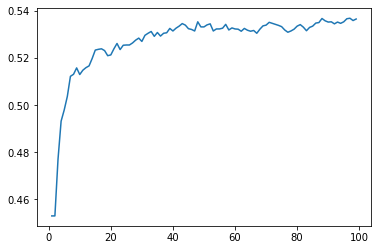

In [459]:
sns.lineplot(x=np.arange(1,100), y=accuracy_synthetic_data)

In [465]:
clf_oversampling = KNeighborsClassifier(n_neighbors=15, weights='distance')
clf_oversampling.fit(new_mixed_data.iloc[:,:-1], new_mixed_data.Fault_class)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [466]:
prediction_proba = clf_oversampling.predict_proba(test_features)

In [467]:
submission.iloc[:,1:] = prediction_proba

In [468]:
submission.to_csv("../data/submission_synthetic_knn.csv", index=False)